#                                                    LOS ANGELES

# Crime Rates

This portion gets the raw data for the crime rate.  Keep in mind that most of it is just data cleanup.

In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the URL for the JSON Request
city = "Tampa, Florida"

url = "https://odn.data.socrata.com/resource/h4kz-unyt.json?name=" + city

data = requests.get(url).json()

In [3]:
#Convert JSON to Dataframe

data_df = pd.DataFrame(data)

In [4]:
#Sorting the values by year
data_df = data_df.sort_values('year')

#Finding only the "rate" of the number of crimes, not the count, so that it's uniform city to city
crime_rate_df = data_df.loc[data_df['variable'] == 'rate']

crime_rate_df.head()

,crime_type,id,key,name,place_name,type,value,variable,year
106,Property crime,1600000US1271000,1600000US1271000--2006--Property crime--rate,"Tampa, Florida","Tampa, FL",place,5668.095581425516,rate,2006
26,Forcible rape,1600000US1271000,1600000US1271000--2006--Forcible rape--rate,"Tampa, Florida","Tampa, FL",place,40.12223707113703,rate,2006
104,Larceny,1600000US1271000,1600000US1271000--2006--Larceny--rate,"Tampa, Florida","Tampa, FL",place,3394.0999194538554,rate,2006
157,Murder and nonnegligent manslaughter,1600000US1271000,1600000US1271000--2006--Murder and nonnegligen...,"Tampa, Florida","Tampa, FL",place,7.541773885552073,rate,2006
186,Burglary,1600000US1271000,1600000US1271000--2006--Burglary--rate,"Tampa, Florida","Tampa, FL",place,1342.737422583691,rate,2006


In [5]:
#Filtering down to only the Violent Crimes

violent_crime_df = crime_rate_df.loc[crime_rate_df['crime_type'] == 'Violent crime']

#violent_crime_df

In [6]:
#Deleting repeat data (won't be the same for each city) and resetting the index  *********Important**********
#violent_crime_df = violent_crime_df.drop(index=213)
violent_crime_df = violent_crime_df.reset_index()
violent_crime_df

,index,crime_type,id,key,name,place_name,type,value,variable,year
0,112,Violent crime,1600000US1271000,1600000US1271000--2006--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,1158.1147978653764,rate,2006
1,4,Violent crime,1600000US1271000,1600000US1271000--2007--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,1060.1387818041635,rate,2007
2,145,Violent crime,1600000US1271000,1600000US1271000--2008--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,883.0225193003494,rate,2008
3,172,Violent crime,1600000US1271000,1600000US1271000--2009--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,752.2455848658732,rate,2009
4,1,Violent crime,1600000US1271000,1600000US1271000--2010--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,623.8679814852082,rate,2010
5,102,Violent crime,1600000US1271000,1600000US1271000--2011--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,654.7472111530369,rate,2011
6,86,Violent crime,1600000US1271000,1600000US1271000--2012--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,616.3793840767709,rate,2012
7,28,Violent crime,1600000US1271000,1600000US1271000--2013--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,596.901916803771,rate,2013
8,144,Violent crime,1600000US1271000,1600000US1271000--2014--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,582.4307523437238,rate,2014
9,216,Violent crime,1600000US1271000,1600000US1271000--2015--Violent crime--rate,"Tampa, Florida","Tampa, FL",place,630.6551074007294,rate,2015


In [7]:
#Getting only the data we need
violent_crime_df = violent_crime_df[['year','crime_type', 'value', 'variable']]
violent_crime_df

,year,crime_type,value,variable
0,2006,Violent crime,1158.1147978653764,rate
1,2007,Violent crime,1060.1387818041635,rate
2,2008,Violent crime,883.0225193003494,rate
3,2009,Violent crime,752.2455848658732,rate
4,2010,Violent crime,623.8679814852082,rate
5,2011,Violent crime,654.7472111530369,rate
6,2012,Violent crime,616.3793840767709,rate
7,2013,Violent crime,596.901916803771,rate
8,2014,Violent crime,582.4307523437238,rate
9,2015,Violent crime,630.6551074007294,rate


In [8]:
#Converting the correct columns to numbers, not objects

violent_crime_df['year'] = pd.to_numeric(violent_crime_df['year'])
violent_crime_df['value'] = pd.to_numeric(violent_crime_df['value'])

Text(0, 0.5, 'Rate (Per 100,000 People)')

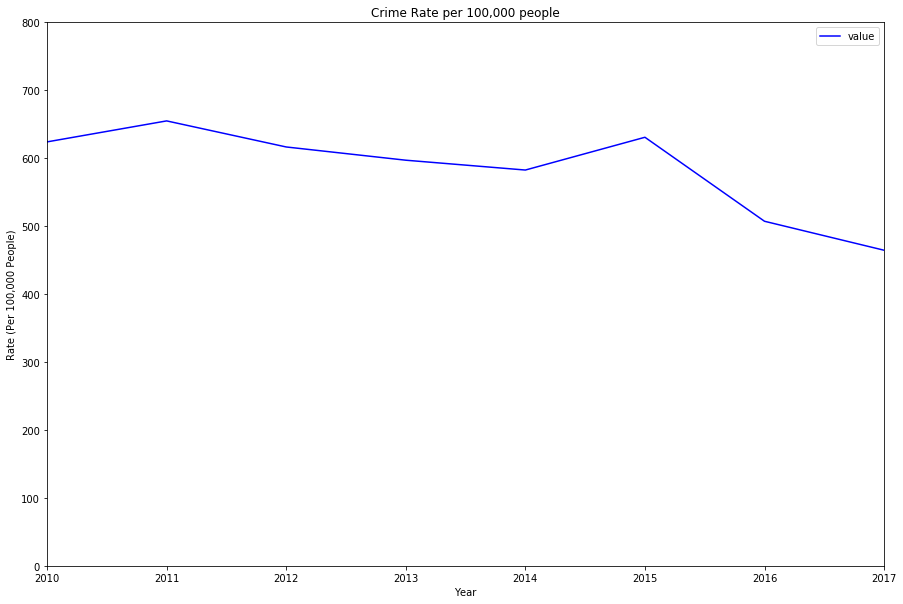

In [17]:
#Plot the graph
violent_crime_df.plot(kind='line', x='year', y='value', figsize=(15,10), color='blue')
plt.xlim(2010, 2017)
plt.ylim(0, 800)
plt.title('Crime Rate per 100,000 people')
plt.xlabel('Year')
plt.ylabel('Rate (Per 100,000 People)')

# Education Rates

Getting the graduation rates from the same site, but creating my own CSV file manually in Excel

In [10]:
#Import and Read the CSV File
csv_file = 'Tampa_education.csv'

edu_data = pd.read_csv(csv_file)

#Turn it into a DataFrame
edu_df = pd.DataFrame(edu_data)

#edu_df

Text(0, 0.5, 'Graduation Rate')

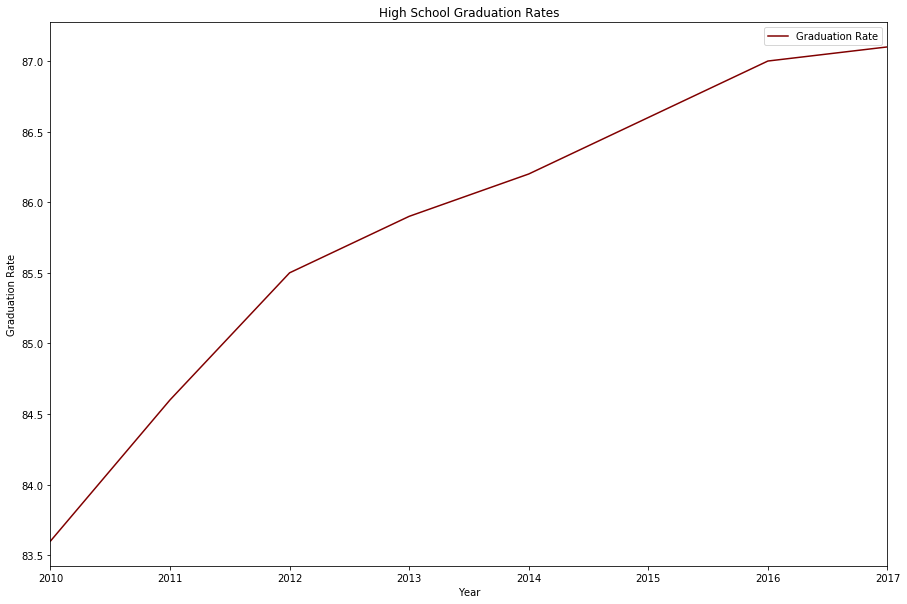

In [11]:
#Plot the graph
edu_df.plot(kind='line', x='Year', y='Graduation Rate', figsize=(15,10), color='maroon')
plt.title('High School Graduation Rates')
plt.xlabel('Year')
plt.ylabel('Graduation Rate')

# Income

Same process as the education rates.  Create your own CSV based on the website

In [12]:
#Import and Read the CSV File
csv_file = 'Tampa_income.csv'

income_data = pd.read_csv(csv_file)

#Turn it into a DataFrame
income_df = pd.DataFrame(income_data)

#income_df

In [13]:
#Sum the percentages together to get amount making below $25,000 (poverty)

income_df['% <25000'] = income_df['% 15000-24999'] + income_df['% 10000-14999'] + income_df['% <10000']
income_df

,Year,% 15000-24999,% 10000-14999,% <10000,Median Income,% <25000
0,2017,15.1,4.1,1.5,31344.0,20.7
1,2016,15.5,4.1,1.5,30936.0,21.1
2,2015,15.6,3.8,1.5,30717.0,20.9
3,2014,15.6,3.9,1.6,30551.0,21.1
4,2013,16.5,3.7,1.6,29739.0,21.8
5,2012,16.7,4.3,1.8,29069.0,22.8
6,2011,16.3,4.6,1.8,28860.0,22.7
7,2010,17.7,5.1,1.8,27419.0,24.6


In [14]:
#Get just the columns we need

poverty_df = income_df[['Year', '% <25000']]
poverty_df

,Year,% <25000
0,2017,20.7
1,2016,21.1
2,2015,20.9
3,2014,21.1
4,2013,21.8
5,2012,22.8
6,2011,22.7
7,2010,24.6


Text(0, 0.5, 'Percentage of Population')

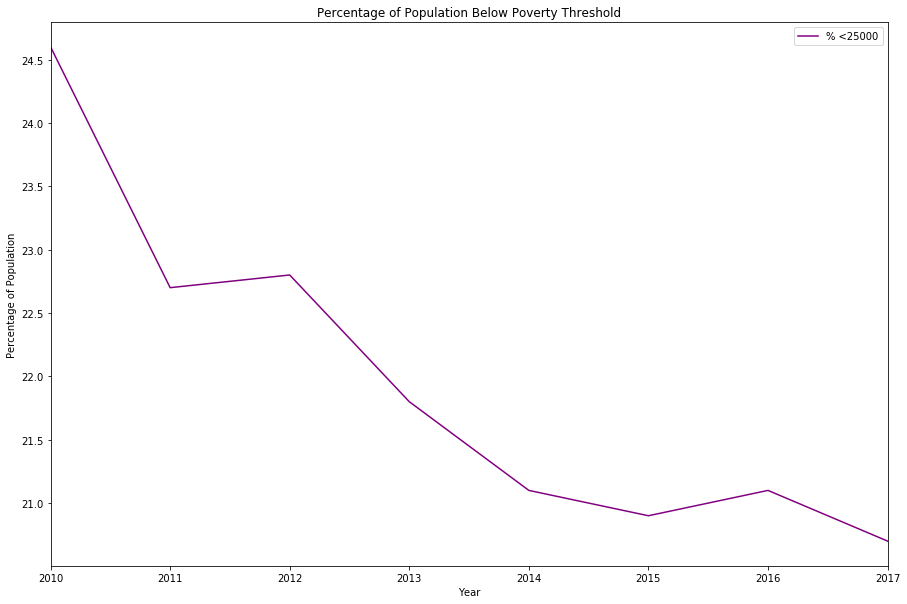

In [15]:
#Plot the Poverty Graph
poverty_df.plot(kind='line', x='Year', y='% <25000', figsize=(15,10), color='purple')
plt.title('Percentage of Population Below Poverty Threshold')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')

Text(0, 0.5, '$ Amount per Year')

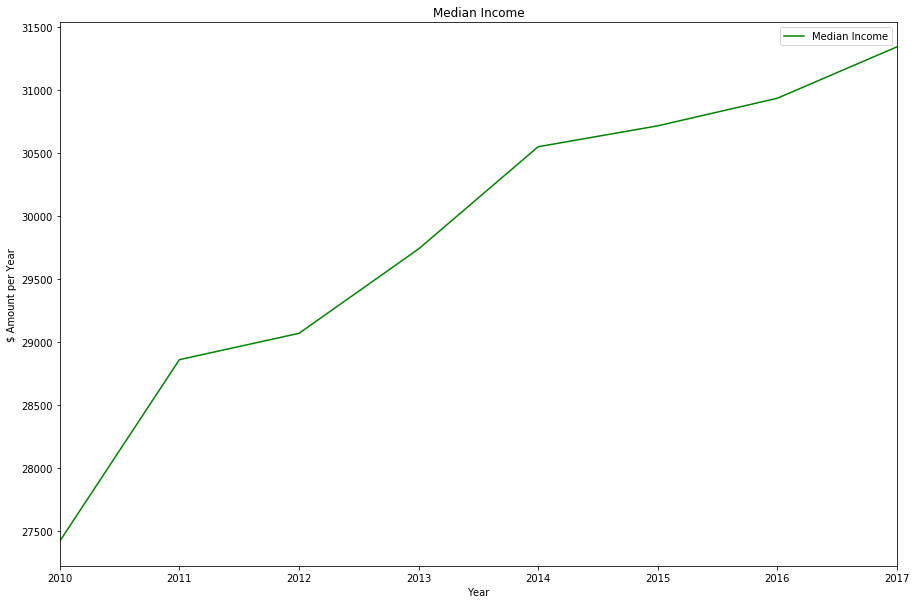

In [16]:
#Get the columns we need

median_income_df = income_df[['Year', 'Median Income']]

#Plot the Median Income Graph
median_income_df.plot(kind='line', x='Year', y='Median Income', figsize=(15,10), color='green')
plt.title('Median Income')
plt.xlabel('Year')
plt.ylabel('$ Amount per Year')